<a href="https://colab.research.google.com/github/EvansXGames/CMP405-Project/blob/main/PC_HardwareStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install databases

In [8]:
import pandas as pd
hardwareStore = pd.read_csv ("/content/hardwareStore.csv")

In [11]:
hardwareStore.head()

,CATEGORY_ID,CATEGORY_NAME,PRODUCT_ID,PRODUCT_NAME,DESCRIPTION,DESCRIPTION - Detail 1,DESCRIPTION - Detail 2,DESCRIPTION - Detail 3,DESCRIPTION - Detail 4,STANDARD_COST,...,REGION_ID,LOCATION_ID,WAREHOUSE_ID,QUANTITY,WAREHOUSE_NAME,ADDRESS,POSTAL_CODE,CITY,STATE,COUNTRY_NAME
0,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,3,11,8,50,Beijing,40-5-12 Laogianggen,190518,Beijing,Shenzhen,China
1,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,3,12,9,36,Bombay,1298 Vileparle (E),490231,Bombay,Maharashtra,India
2,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,2,6,2,97,San Francisco,2011 Interiors Blvd,99236,South San Francisco,California,United States of America
3,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,2,8,4,67,"Seattle, Washington",2004 Charade Rd,98199,Seattle,Washington,United States of America
4,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,3,13,6,30,Sydney,12-98 Victoria Street,2901,Sydney,New South Wales,Australia


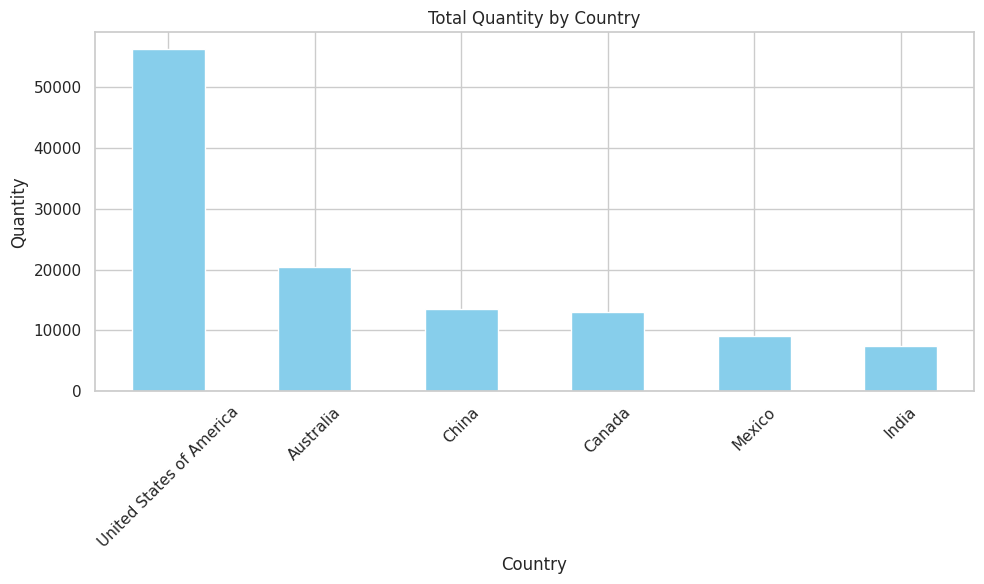

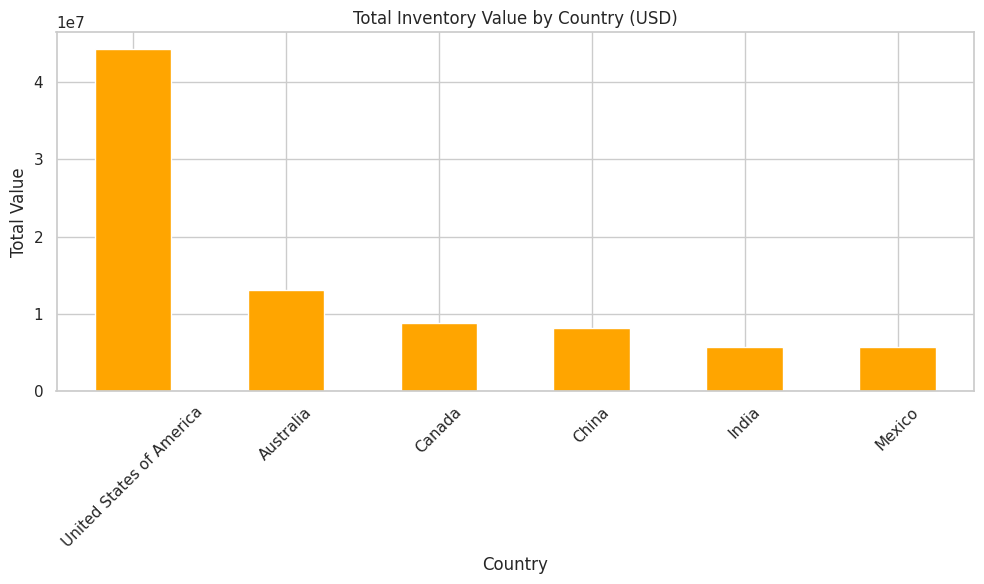

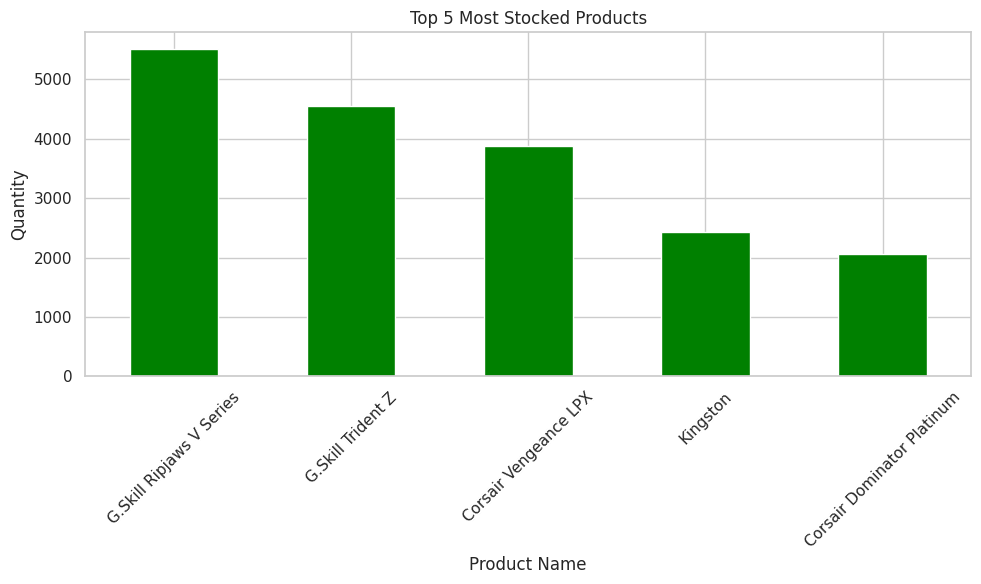

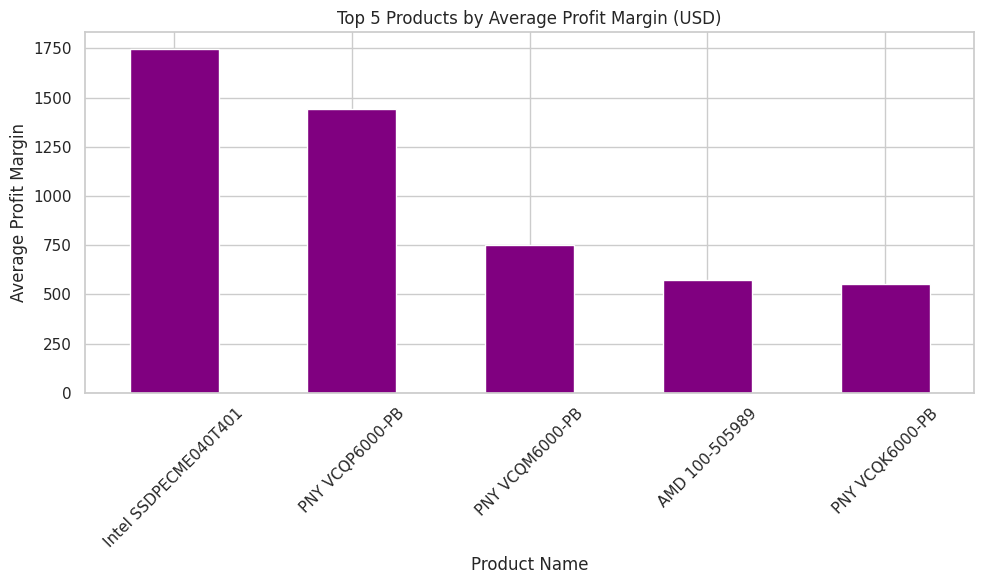

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hardwareStore.csv')

# Create inventory value and profit margin columns
df['INVENTORY_VALUE'] = df['STANDARD_COST'] * df['QUANTITY']
df['PROFIT_MARGIN'] = df['LIST_PRICE'] - df['STANDARD_COST']

# 1. Total quantity per country
quantity_by_country = df.groupby('COUNTRY_NAME')['QUANTITY'].sum().sort_values(ascending=False)

# 2. Total inventory value per country
inventory_value_by_country = df.groupby('COUNTRY_NAME')['INVENTORY_VALUE'].sum().sort_values(ascending=False)

# 3. Top 5 most stocked products
top_products_by_quantity = df.groupby('PRODUCT_NAME')['QUANTITY'].sum().sort_values(ascending=False).head(5)

# 4. Top 5 products by profit margin
average_margin_per_product = df.groupby('PRODUCT_NAME')['PROFIT_MARGIN'].mean().sort_values(ascending=False).head(5)

# Visualization setup
sns.set(style="whitegrid")

# Plot 1: Total Quantity by Country
plt.figure(figsize=(10, 6))
quantity_by_country.plot(kind='bar', color='skyblue')
plt.title('Total Quantity by Country')
plt.ylabel('Quantity')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Total Inventory Value by Country
plt.figure(figsize=(10, 6))
inventory_value_by_country.plot(kind='bar', color='orange')
plt.title('Total Inventory Value by Country (USD)')
plt.ylabel('Total Value')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Top 5 Most Stocked Products
plt.figure(figsize=(10, 6))
top_products_by_quantity.plot(kind='bar', color='green')
plt.title('Top 5 Most Stocked Products')
plt.ylabel('Quantity')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 4: Top 5 Products by Average Profit Margin
plt.figure(figsize=(10, 6))
average_margin_per_product.plot(kind='bar', color='purple')
plt.title('Top 5 Products by Average Profit Margin (USD)')
plt.ylabel('Average Profit Margin')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the original CSV file
df = pd.read_csv('hardwareStore.csv')

# Make a copy of the dataframe for encoding
df_encoded = df.copy()

# Identify categorical (object-type) columns
categorical_columns = df_encoded.select_dtypes(include=['object']).columns

# Initialize dictionary to store label encoders
label_encoders = {}

# Apply Label Encoding to all categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save the encoder in case you need to decode later

# Optionally: create new columns (if not already in df)
df_encoded['INVENTORY_VALUE'] = df_encoded['STANDARD_COST'] * df_encoded['QUANTITY']
df_encoded['PROFIT_MARGIN'] = df_encoded['LIST_PRICE'] - df_encoded['STANDARD_COST']

# Export to new CSV
df_encoded.to_csv('hardwareStoreencoded.csv', index=False)

print("Encoding complete. Encoded CSV saved as 'hardwareStoreencoded.csv'")


Encoding complete. Encoded CSV saved as 'hardwareStoreencoded.csv'


In [18]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/hardwareStore.csv')

# Define the median quantity as the threshold
threshold = df['QUANTITY'].median()

# Create the binary target column
df['High_Demand'] = df['QUANTITY'].apply(lambda x: 1 if x > threshold else 0)

# Save the updated dataset
df.to_csv('/content/hardwareStore_with_target.csv', index=False)

# Preview
print(df[['PRODUCT_NAME', 'QUANTITY', 'High_Demand']].head())

            PRODUCT_NAME  QUANTITY  High_Demand
0  Intel Xeon E5-1650 V4        50            0
1  Intel Xeon E5-1650 V4        36            0
2  Intel Xeon E5-1650 V4        97            0
3  Intel Xeon E5-1650 V4        67            0
4  Intel Xeon E5-1650 V4        30            0


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/hardwareStore.csv')

# Create binary target based on median QUANTITY
threshold = df['QUANTITY'].median()
df['High_Demand'] = df['QUANTITY'].apply(lambda x: 1 if x > threshold else 0)

# Select features for prediction
features = df[[
    'CATEGORY_ID', 'STANDARD_COST', 'LIST_PRICE',
    'REGION_ID', 'WAREHOUSE_ID'
]]
target = df['High_Demand']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Show dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Optional: view training sample
print(X_train.head())

X_train shape: (889, 5)
X_test shape: (223, 5)
y_train shape: (889,)
y_test shape: (223,)
      CATEGORY_ID  STANDARD_COST  LIST_PRICE  REGION_ID  WAREHOUSE_ID
866             5         602.40      680.99          3             6
994             5         223.99      279.99          2             5
1024            5          52.70       59.99          2             5
781             5         556.80      758.99          3             6
898             5         499.09      645.99          3             9


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv('/content/hardwareStore.csv')

# Create binary target
threshold = df['QUANTITY'].median()
df['High_Demand'] = df['QUANTITY'].apply(lambda x: 1 if x > threshold else 0)

# Feature selection
features = df[[
    'CATEGORY_ID', 'STANDARD_COST', 'LIST_PRICE',
    'REGION_ID', 'WAREHOUSE_ID'
]]
target = df['High_Demand']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.874439461883408
Confusion Matrix:
 [[97 15]
 [13 98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       112
           1       0.87      0.88      0.88       111

    accuracy                           0.87       223
   macro avg       0.87      0.87      0.87       223
weighted avg       0.87      0.87      0.87       223



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/hardwareStore.csv')

# Create binary target: High_Demand (1 if quantity > median)
median_quantity = df['QUANTITY'].median()
df['High_Demand'] = df['QUANTITY'].apply(lambda x: 1 if x > median_quantity else 0)

# Select features for prediction
features = df[['CATEGORY_ID', 'STANDARD_COST', 'LIST_PRICE', 'REGION_ID', 'WAREHOUSE_ID']]
target = df['High_Demand']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 87.44%


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

# Load dataset
df = pd.read_csv('/content/hardwareStore.csv')

# Create binary target column based on median quantity
median_quantity = df['QUANTITY'].median()
df['High_Demand'] = df['QUANTITY'].apply(lambda x: 1 if x > median_quantity else 0)

# Select features
features = df[['CATEGORY_ID', 'STANDARD_COST', 'LIST_PRICE', 'REGION_ID', 'WAREHOUSE_ID']]
target = df['High_Demand']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Print precision
print(f"Model Precision: {precision:.2%}")

Model Precision: 86.73%


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

# Load dataset
df = pd.read_csv('/content/hardwareStore.csv')

# Create binary target column: High_Demand
median_quantity = df['QUANTITY'].median()
df['High_Demand'] = df['QUANTITY'].apply(lambda x: 1 if x > median_quantity else 0)

# Select features
features = df[['CATEGORY_ID', 'STANDARD_COST', 'LIST_PRICE', 'REGION_ID', 'WAREHOUSE_ID']]
target = df['High_Demand']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Print recall
print(f"Model Recall: {recall:.2%}")

Model Recall: 88.29%
